In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [122]:
df=pd.read_csv('Car.csv')

In [5]:
df.head()

,Unnamed: 0,Car_Name,Variant,Kilometer,Owner,Fuel_Type,Price
0,0,2013 Maruti Alto 800,LXI Manual,"14,466 km",1st Owner,Petrol,"₹2,32,099"
1,1,2020 Maruti New Wagon-R,LXI CNG 1.0 L Manual,"6,207 km",1st Owner,Petrol + CNG,"₹5,65,599"
2,2,2020 Maruti Alto,LXI Manual,"2,901 km",1st Owner,Petrol,"₹3,73,099"
3,3,2018 Maruti Baleno,DELTA 1.2 K12 Manual,"6,905 km",1st Owner,Petrol,"₹5,63,599"
4,4,2015 Maruti Alto 800,LXI Manual,"17,637 km",1st Owner,Petrol,"₹2,69,899"


## EDA

In [3]:
df.shape

(5149, 7)

There are 5149 rows and 7 columnsin our dataset.

In [6]:
df.dtypes

Unnamed: 0     int64
Car_Name      object
Variant       object
Kilometer     object
Owner         object
Fuel_Type     object
Price         object
dtype: object

All data are object type.

In [7]:
for i in df.columns:
    print(i , df[i].nunique())

Unnamed: 0 5149
Car_Name 622
Variant 863
Kilometer 3991
Owner 5
Fuel_Type 5
Price 3060


In [8]:
df.isnull().sum()

Unnamed: 0    0
Car_Name      0
Variant       0
Kilometer     0
Owner         0
Fuel_Type     0
Price         0
dtype: int64

There are no missing value

In [9]:
df.duplicated().sum()

0

There are no duplicate values in our dataset.

In [10]:
df['Fuel_Type'].value_counts()

Petrol          3302
Diesel          1633
Petrol + CNG     206
Petrol + LPG       6
Electric           2
Name: Fuel_Type, dtype: int64

In [11]:
df['Owner'].value_counts()

1st Owner    4107
2nd Owner     896
3rd Owner     135
4th Owner       8
5th Owner       3
Name: Owner, dtype: int64

### Feature Engineering

In [12]:
#Extracting year from car name
df['Year'] = df['Car_Name'].str.split(' ').str[0]

In [16]:
#Extracting Brand name from car name column
df['Brand'] = df['Car_Name'].str.split(' ').str[1]

In [38]:
#Extracting name of car
df['CarName'] = df['Car_Name'].str.replace('2...',' ',regex=True)

In [40]:
df.drop('Car_Name',axis=1,inplace=True)

In [43]:
#Extracting type of variant of car. i.e Manual/Automatic
df['Variant']=df['Variant'].str.split(' ').str[-1]

In [49]:
#Removing Comma and km from Kilometer column and converting it to int type
df['Kilometer'] = df['Kilometer'].str.split( ).str[0]
df['Kilometer']=df['Kilometer'].str.replace(",","").astype(int)

In [58]:
#Removing Comma and Rupee from Price column and converting it to int type
df['Price']=df['Price'].str.replace('₹',"")
df['Price']=df['Price'].str.replace(',',"").astype(int)

In [61]:
#Dropping unneccassary column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [81]:
df['Variant'].value_counts()

Manual       4218
Automatic     789
Not-Known     142
Name: Variant, dtype: int64

In [78]:
df['Variant'].replace({'G':'Not-Known','HYBIRD':'Not-Known','J':'Not-Known','TONE':'Not-Known','REVOTRON':'Not-Known','EXI':'Not-Known','Kryotec':'Not-Known','CNG':'Not-Known','1.0':'Not-Known','III':'Not-Known','CRDI':'Not-Known','VTVT':'Not-Known','PETROL':'Not-Known','MT':'Not-Known','FWD':'Not-Known','SHVS':'Not-Known','CVT':'Not-Known','STR':'Not-Known','L':'Not-Known','STD':'Not-Known','1.2':'Not-Known','(SUNROOF)':'Not-Known','ABS':'Not-Known','Petrol':'Not-Known','RXZ':'Not-Known','HYBRID':'Not-Known','AGS':'Not-Known','SUNROOF':'Not-Known','REGALIA':'Not-Known','(O)':'Not-Known','VDI':'Not-Known','KAPPA':'Not-Known','ITI':'Not-Known','W5':'Not-Known','EXPLORE':'Not-Known','LINE':'Not-Known','CONVERTIBLE':'Not-Known','Door':'Not-Known','SPORTSLINE':'Not-Known','PLUS':'Not-Known','VXI':'Not-Known','1.1':'Not-Known','PREMIUM':'Not-Known','DIESEL':'Not-Known','XT+':'Not-Known','TI-VCT':'Not-Known','Edition':'Not-Known'},inplace=True)

In [79]:
df['Variant'].replace({'AT':"Automatic",'AMT':'Automatic'},inplace=True)

In [80]:
df

,Variant,Kilometer,Owner,Fuel_Type,Price,Year,Brand,CarName
0,Manual,14466,1st Owner,Petrol,232099,2013,Maruti,Maruti Alto 800
1,Manual,6207,1st Owner,Petrol + CNG,565599,2020,Maruti,Maruti New Wagon-R
2,Manual,2901,1st Owner,Petrol,373099,2020,Maruti,Maruti Alto
3,Manual,6905,1st Owner,Petrol,563599,2018,Maruti,Maruti Baleno
4,Manual,17637,1st Owner,Petrol,269899,2015,Maruti,Maruti Alto 800
...,...,...,...,...,...,...,...,...
5144,Manual,53668,1st Owner,Petrol,332499,2017,Maruti,Maruti Alto K10
5145,Manual,35464,1st Owner,Diesel,2938999,2018,Toyota,Toyota Fortuner
5146,Manual,35739,2nd Owner,Diesel,1146000,2018,Mahindra,Mahindra XUV500
5147,Automatic,72661,2nd Owner,Diesel,995000,2013,Mitsubishi,Mitsubishi Pajero Sport


## VISUALIZATION

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Tata'),
  Text(3, 0, 'Renault'),
  Text(4, 0, 'Volkswagen'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'KIA'),
  Text(7, 0, 'MG'),
  Text(8, 0, 'Datsun'),
  Text(9, 0, 'Toyota'),
  Text(10, 0, 'Honda'),
  Text(11, 0, 'Chevrolet'),
  Text(12, 0, 'Skoda'),
  Text(13, 0, 'Mahindra'),
  Text(14, 0, 'Mercedes'),
  Text(15, 0, 'Nissan'),
  Text(16, 0, 'Audi'),
  Text(17, 0, 'Mitsubishi'),
  Text(18, 0, 'Jeep'),
  Text(19, 0, 'BMW'),
  Text(20, 0, 'Fiat'),
  Text(21, 0, 'RENAULT'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'Ssangyong'),
  Text(24, 0, 'Jaguar'),
  Text(25, 0, 'HYUNDAI')])

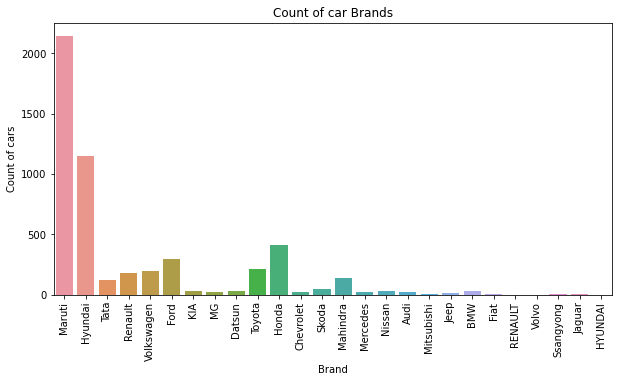

In [83]:
plt.figure(figsize = (10, 5))
plt.title('Count of car Brands')
sns.countplot(x = 'Brand', data = df)
plt.xlabel('Brand')
plt.ylabel('Count of cars')
plt.xticks(rotation=90)

Majority of the people in India trusts Maruti, Hyundai and Honda. Very less people are buying cars from KIA, MG, Audi, JAguar, Mercedes and more expensive cars

Text(0, 0.5, 'Price of Car')

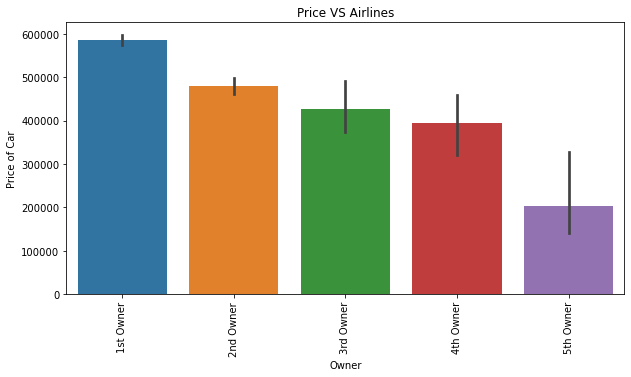

In [87]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Airlines')
sns.barplot(x='Owner',y='Price',data=df)
plt.xticks(rotation = 90)
plt.xlabel('Owner')
plt.ylabel('Price of Car')

It is evident that price of cars decrease with increase in the number of owners.

Text(0, 0.5, 'Price of Car')

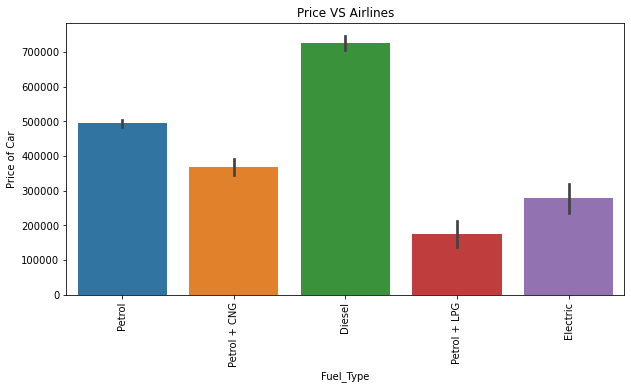

In [88]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Airlines')
sns.barplot(x='Fuel_Type',y='Price',data=df)
plt.xticks(rotation = 90)
plt.xlabel('Fuel_Type')
plt.ylabel('Price of Car')

Price of diesel car as compared to petrol and electric cars

Text(0, 0.5, 'Price of Car')

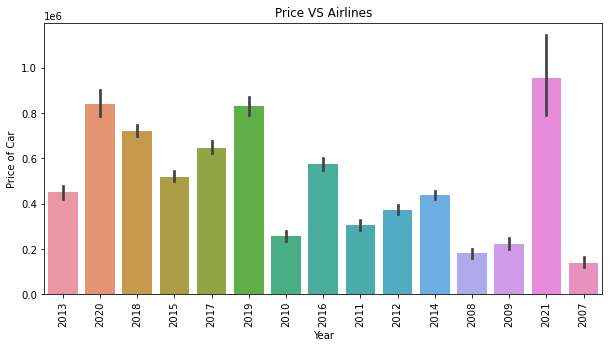

In [89]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Airlines')
sns.barplot(x='Year',y='Price',data=df)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Price of Car')

As the car gets old, its sale price tends to decrease.

Text(0, 0.5, 'Price of Car')

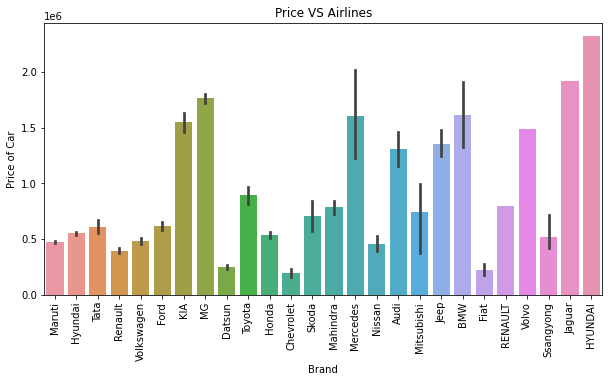

In [92]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Airlines')
sns.barplot(x='Brand',y='Price',data=df)
plt.xticks(rotation = 90)
plt.xlabel('Brand')
plt.ylabel('Price of Car')

High end cars have more resale values. It is quite obious as there cost price is also high.

<AxesSubplot:xlabel='Kilometer', ylabel='Price'>

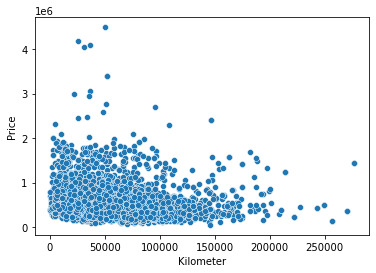

In [91]:
sns.scatterplot(x='Kilometer',y='Price',data=df)

As the the number of kilometers covered by car increase, its price decreases.

In [ ]:
#Performing Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Variant']=le.fit_transform(df['Variant'])
df['Owner']=le.fit_transform(df['Owner'])
df['Year']=le.fit_transform(df['Year'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['CarName']=le.fit_transform(df['CarName'])

## Model Evaluation

In [96]:
#Separating x and y for model evaluation
x=df.drop('Price',axis=1)
y=df[['Price']]

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [98]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [104]:
model=[DecisionTreeRegressor(), KNeighborsRegressor(),RandomForestRegressor(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

DecisionTreeRegressor()
0.9999981270871856
error: 
Mean absolute error:  74466.8491909385
Mean squared error:  32480233589.202587
Root mean squared error:  180222.7332752519
r2_score 0.7330615508300624



KNeighborsRegressor()
0.2926193036582414
error: 
Mean absolute error:  244699.77449838186
Mean squared error:  127335791085.25006
Root mean squared error:  356841.40887129406
r2_score -0.04650782460577463



RandomForestRegressor()
0.9762676193306551
error: 
Mean absolute error:  62981.03507936508
Mean squared error:  14582740899.71201
Root mean squared error:  120759.0199517701
r2_score 0.8801519013179082



LinearRegression()
0.39438883782822975
error: 
Mean absolute error:  181793.3398559552
Mean squared error:  83278776715.46074
Root mean squared error:  288580.6242897481
r2_score 0.3155742724527504





In [105]:
from xgboost import XGBRegressor
m=XGBRegressor()
m.fit(x_train,y_train)
m.score(x_train,y_train)
predm=m.predict(x_test)
print(m)
print(m.score(x_train,y_train))
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predm))
print("Mean squared error: ",mean_squared_error(y_test,predm))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
print("r2_score",r2_score(y_test,predm))
print("\n\n")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.9859319631034226
error: 
Mean absolute error:  61634.84902912621
Mean squared error:  12391761296.291014
Root mean squared error:  111318.2882382361
r2_score 0.8981584435397779





### Cross Validation

In [108]:
from sklearn.model_selection import cross_val_score
dtscore=cross_val_score(DecisionTreeRegressor(),x,y,cv=5,scoring='r2')
dtc=dtscore.mean()
print('Cross val score:',dtc*100)

Cross val score: 69.77590737685026


In [109]:
knnscore=cross_val_score(KNeighborsRegressor(),x,y,cv=5,scoring='r2')
knn=knnscore.mean()
print('Cross val score:',knn*100)

Cross val score: -10.033025075012256


In [110]:
rfscore=cross_val_score(RandomForestRegressor(),x,y,cv=5,scoring='r2')
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

Cross val score: 85.86384096676414


In [112]:
lrscore=cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
lrc=lrscore.mean()
print('Cross val score:',lrc*100)

Cross val score: 35.39362598775026


In [113]:
xgscore=cross_val_score(m,x,y,cv=5,scoring='r2')
xgc=xgscore.mean()
print('Cross val score:',xgc*100)

Cross val score: 87.5287084490602


### Regularization

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Ridge()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [115]:
ls=Ridge(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
lss=r2_score(y_test,predls)
print('r2_score:', lss)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predls))
print("Mean squared error: ",mean_squared_error(y_test,predls))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predls)))

r2_score: 0.33499771683948876
error: 
Mean absolute error:  178595.62970207067
Mean squared error:  91642025428.35483
Root mean squared error:  302724.339008866


Looking at the difference between accuracy and r2_score, xgboost and random forest are performing better than other algorithms. We will further perform hyperparameter tuning on them and find out the best parameters.

## HyperParameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0],"min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}
xg=XGBRegressor()
clf=RandomizedSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'reg_lambda': 1.0, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}


In [118]:
xg=XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=500,min_child_weight=3,gamma=0.1,colsample_bytree=0.5,reg_lambda=1.0)
xg.fit(x_train,y_train)
xg.score(x_train,y_train)
pred_xg=xg.predict(x_test)
xgs=r2_score(y_test,pred_xg)
print('R2 Score:',xgs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_xg))
print("Mean squared error: ",mean_squared_error(y_test,pred_xg))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_xg)))
xgscore=cross_val_score(xg,x,y,cv=5,scoring='r2')
xgc=xgscore.mean()
print('Cross val score:',xgc*100)

R2 Score: 88.36492016340743
error: 
Mean absolute error:  63543.60050819175
Mean squared error:  16033964232.098597
Root mean squared error:  126625.29064961153
Cross val score: 88.65699726467376


In [119]:
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[100,500],'max_depth': [4,5,6,7,8]}
rf=RandomForestRegressor()
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'mae'}


In [120]:
rf=RandomForestRegressor(criterion="mae",max_features="log2",n_estimators=100,max_depth=8)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))
rfscore=cross_val_score(rf,x,y,cv=5,scoring='r2')
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

R2 Score: 62.89719967266512
error: 
Mean absolute error:  113193.82297087378
Mean squared error:  51130287175.872696
Root mean squared error:  226120.07247449903
Cross val score: 69.23648758732138


After hyperparameter tuning, XGBRegressor with default parameters is performing best as it has better r2_score and MSE nd mAE.

## Saving the Model

In [121]:
import joblib
joblib.dump(xg,'CarPrice.obj')

['CarPrice.obj']